<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 2

En esta notebook trabajeremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{0.01}x & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

La función de distribución de X es $$
F ( x ) = \begin{cases}
~~ 1 - e^{{-0.01}x} &amp; si ~~ x ≥ 0 \\
~~ 0 &amp; si ~~ x&lt;0
\end{cases}
$$

Entonces

$P(50\leq X \leq 150) = F(150)- F(50) = 1 - e^{{-0.01}*150}- ( 1 - e^{{-0.01}*50})= - e^{{-0.01}*150}+   e^{{-0.01}*50}$

$P(0\leq X \leq 100) = F(100)- F(0) = 1 - e^{{-0.01}*100}- ( 1 - e^{{-0.01}*0})= - e^{{-0.01}*100}+   1$

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy.stats import expon
import seaborn as sb

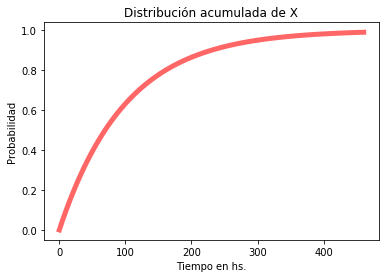

In [40]:
scale = 1/0.01 # 1/lambda
x = np.linspace(expon.ppf(0.0, scale=scale), expon.ppf(0.99, scale=scale), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, expon.cdf(x, scale=scale), 'r-', lw=5, alpha=0.6)
ax.set_title('Distribución acumulada de X')
ax.set_xlabel('Tiempo en hs.')
ax.set_ylabel('Probabilidad')
ax.label_outer()

In [42]:
print('Probabilidad de que funcione entre 50 y 150 antes de descomponerse:')
expon.cdf(150, scale=scale) - expon.cdf(50, scale=scale)

Probabilidad de que funcione entre 50 y 150 antes de descomponerse:


0.38340049956420363

In [43]:

print('Probabilidad de que que una computadora se descomponga antes de registrar 100 horas de uso:')
1 - expon.cdf(100, scale=scale)

Probabilidad de que que una computadora se descomponga antes de registrar 100 horas de uso:


0.36787944117144233

## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal. Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.

In [44]:
mu = 0
sigma = 5
rng = range(-20,30)

In [47]:
def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulutative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, normed=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 

Sample descriptive statistics:
                  0
count  10000.000000
mean       0.112513
std        4.966329
min      -20.306791
25%       -3.249640
50%        0.044181
75%        3.427865
max       22.122670


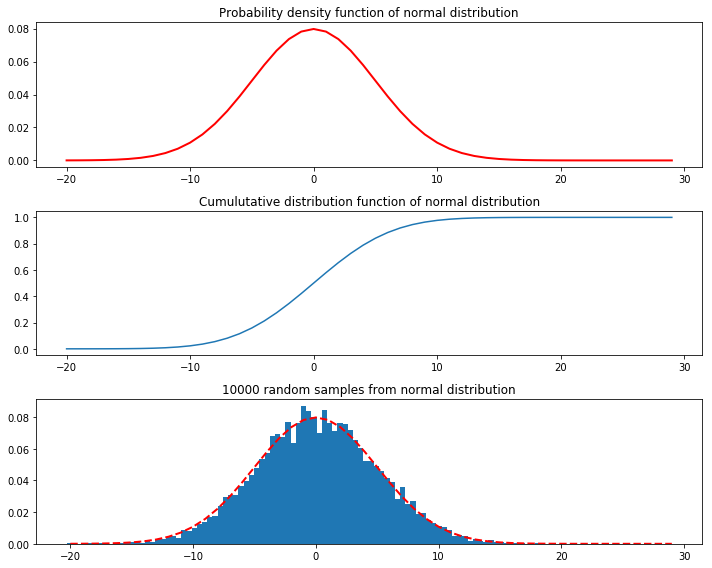

In [48]:
graphic_normal(mu, sigma, rng)

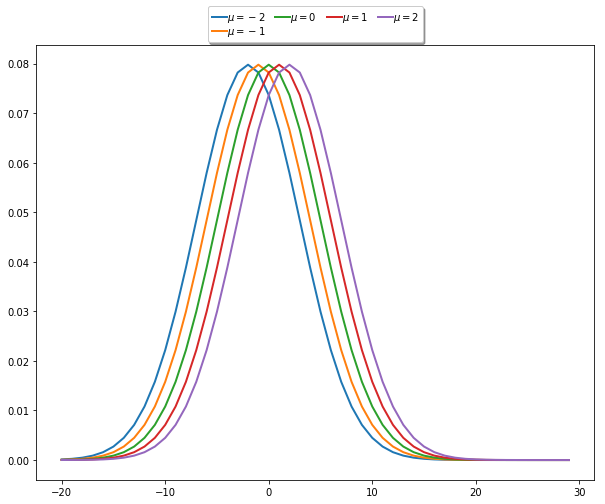

In [58]:

cambia_mu=[]
for i in range(0,5):
 cambia_mu.append(norm(i-2, sigma))
#colormap = plt.cm.gist_ncar
#plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, 10)])
plt.figure(figsize=(10,8))
labels = []
for i in range(0,5):
 plt.plot(rng, cambia_mu[i].pdf(rng), linewidth=2)
 labels.append(r'$\mu = %i $' % (i-2))
plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

Cambiar mu corre la gráfica

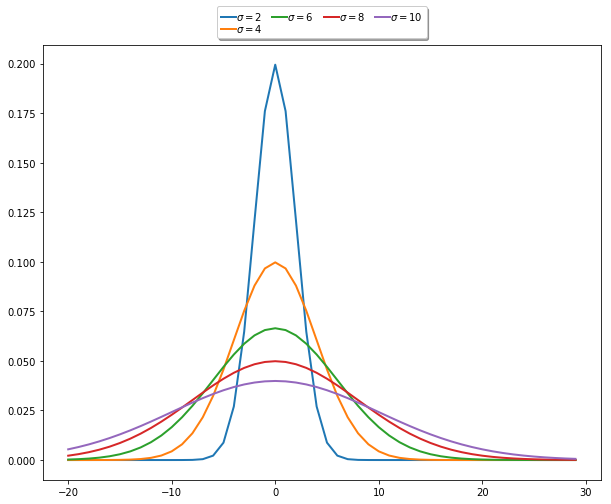

In [64]:
cambia_sigma=[]
for i in range(0,5):
 cambia_sigma.append(norm(mu,2*(i+1)))
plt.figure(figsize=(10,8))
labels2 = []
for i in range(0,5):
 plt.plot(range(-20,30), cambia_sigma[i].pdf(range(-20,30)), linewidth=2)
 labels2.append(r'$\sigma = %i $' % (2*(i+1)))
plt.legend(labels2, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

Cambiar sigma achata la gráfica

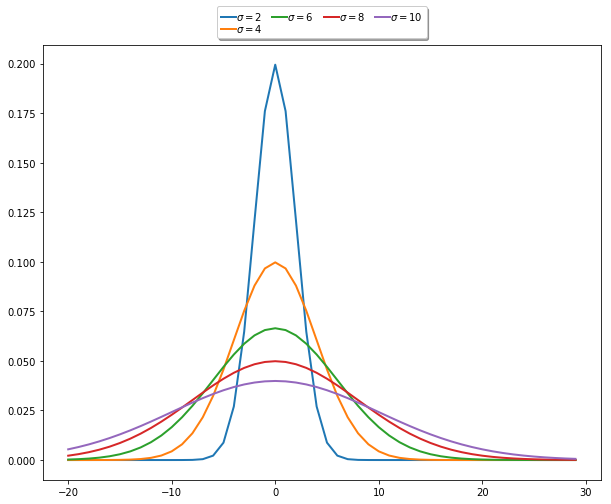

In [66]:
mu = 0
sigma = 5
cambia_rango=[]
for i in range(0,5):
 cambia_rango.append(norm(mu,2*(i+1)))
plt.figure(figsize=(10,8))
labels2 = []
for i in range(0,5):
 plt.plot(range(-20,30), cambia_rango[i].pdf(range(-20,30)), linewidth=2)
 labels2.append(r'$\sigma = %i $' % (2*(i+1)))
plt.legend(labels2, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

correr el rango extiende o desplaza el centro de la campana